# Setting Up Our Environment

In [1]:
# Global Imports
import numpy as np   
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt   # plotting
from sklearn.model_selection import train_test_split  # ML data splits
from sklearn.preprocessing import MinMaxScaler # ML preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


#Set seed
np.random.seed(1234) 

# Import model
from sklearn.tree import DecisionTreeRegressor

# Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Looking at the dataset

In [2]:
#Import dataset
df = pd.read_csv('C:/Users/kimng/Desktop/EDPY506/Final Project/NSDUH_2020.csv', low_memory=False)
df.describe()

,Unnamed: 0,QUESTID2,cigever,cigofrsm,cigwilyr,cigtry,cigyfu,cigmfu,cigrec,CIG30USE,...,govtprog,income,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,verep
count,32893.000000,3.289300e+04,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,...,32893.000000,32893.000000,32768.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000
mean,16447.000000,2.649578e+07,1.555377,83.735141,83.757061,560.897638,9890.192412,93.358526,51.850150,82.936704,...,1.839966,2.902684,2.536469,1.646004,1.735232,1.986228,1.986046,8418.568555,40025.402882,1.410422
std,9495.535539,9.583202e+06,0.496932,34.927911,34.891725,484.033219,905.910716,10.474010,43.773093,23.765419,...,0.366643,1.134239,0.734603,0.598197,0.745474,0.116545,0.117303,13203.001524,14.411373,0.491918
min,1.000000,1.000018e+07,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.889186,40001.000000,1.000000
25%,8224.000000,1.818380e+07,1.000000,99.000000,99.000000,16.000000,9991.000000,91.000000,4.000000,91.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1322.798000,40013.000000,1.000000
50%,16447.000000,2.641664e+07,2.000000,99.000000,99.000000,991.000000,9991.000000,91.000000,91.000000,91.000000,...,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3939.994000,40025.000000,1.000000
75%,24670.000000,3.484307e+07,2.000000,99.000000,99.000000,991.000000,9999.000000,99.000000,91.000000,93.000000,...,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,9931.880000,40038.000000,2.000000
max,32893.000000,4.307541e+07,2.000000,99.000000,99.000000,997.000000,9999.000000,99.000000,91.000000,98.000000,...,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,223960.300000,40050.000000,2.000000


In [3]:
df.shape

(32893, 2891)

In [4]:
#Select columns to be used for analyses
columns = [
            ##OUTCOME VARIABLE -- Opioid misuse
            'pnrnmlif', #EVER USED PAIN RELIEVER NOT DIRECTED BY DR
    
            ## Demographics 
            'CATAG6', #recoded age group (6 levels)
            'NEWRACE2', #Race/Ethiniciy 
            'irsex', #Sex
            'sexident', #Sexual Identity
            'IREDUHIGHST2', #Education
            'irwrkstat', #Employment status 
            'IRPINC3', #Respondent's income level
            'COUTYP4', #county metro/nonmetro status
            'health', #Respondent's reported overall health
            
            ## Health Insurance
            'IRINSUR4', #Insurance status
            'hltinmnt', #Coverage for mental or emotional problems
            'hltinalc', #Coverage for alcohol abuse or alcoholism
            'hltindrg',#Coverage for drug abuse treatment
    
            ## Mental Health
            'WHODASC2',#Mental Health Score, indicating the level of impairment for respondents
            'spdyr', #serious psychological distress indicator
            'mhsuithk',#serious suicidal ideation indicator
            'UDYR5ILAL',# adult illicit drug or alcohol use disorder
            'amdelt', # adult lifetime major depressive disorder
    
            ## Reasons for misuse
            'pnrrspain',#relieve physical pain
            'pnrrspain',#relax
            'pnrrsexpt',#experiment
            'pnrrshigh',#feel good/get high
            'pnrrshigh',#help with sleep
            'pnrrsemot',#help with feelings/emotions
            'pnrrssor', #for other drug effects
            'pnrrshook',#feel “hooked”
            'pnrrssor'#other reasons
]

#Subset data
data = df[columns]

In [5]:
data.columns

Index(['pnrnmlif', 'CATAG6', 'NEWRACE2', 'irsex', 'sexident', 'IREDUHIGHST2',
       'irwrkstat', 'IRPINC3', 'COUTYP4', 'health', 'IRINSUR4', 'hltinmnt',
       'hltinalc', 'hltindrg', 'WHODASC2', 'spdyr', 'mhsuithk', 'UDYR5ILAL',
       'amdelt', 'pnrrspain', 'pnrrspain', 'pnrrsexpt', 'pnrrshigh',
       'pnrrshigh', 'pnrrsemot', 'pnrrssor', 'pnrrshook', 'pnrrssor'],
      dtype='object')

## Examining Variables

### Pain reliever misuse (pnrnmlif) 
Check 2020 NSDUH codebook **page 64** for additional information on the variable

In [6]:
#EVER USED PAIN RELIEVER NOT DIRECTED BY DR: 'pnrnmlif'

#Count number of cases by unique values
data.pnrnmlif.value_counts()

#Excluding rows with bad data (pnrnmlif = 85), missing values (pnrnmlif = 99)
# respondent refused to answer (pnrnmlif = 97), respondent didn't know (pnrnmlif = 94)

data_filtered = data.query("pnrnmlif== 1| pnrnmlif==2| pnrnmlif==5| pnrnmlif==91")

#Count number of cases by unique values
data_filtered.pnrnmlif.value_counts()

91    15644
2     13938
1      1852
5      1058
Name: pnrnmlif, dtype: int64

In [44]:
#Recode pnrnmlif==5 (logically assigned yes) into 1 (Yes)
data_filtered.loc[data_filtered['pnrnmlif'] == 5, 'pnrnmlif'] = 1

#Recode pnrnmlif==91 (never used or misused pain relievers) into 2 (No)
data_filtered.loc[data_filtered['pnrnmlif'] == 91, 'pnrnmlif'] = 2

#Recode pnrnmlif==2 into 0
data_filtered.loc[data_filtered['pnrnmlif'] == 2, 'pnrnmlif'] = 0

#Count number of cases by unique values
data_filtered.pnrnmlif.value_counts() 

#Note class imbalance!!! Make sure to use stratified K-fold split later.

0    24210
1     2731
Name: pnrnmlif, dtype: int64

### Age group (CATAG6)
Age categories:
* 1 = 12-17 Years Old
* 2 = 18-25 Years Old
* 3 = 26-34 Years Old
* 4 = 35-49 Years Old
* 5 = 50-64 Years Old
* 6 = 65 or Older

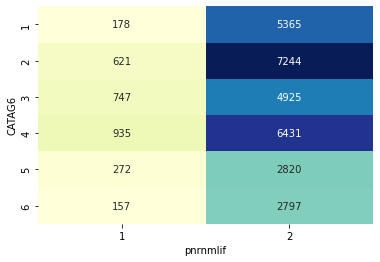

In [8]:
#Visualize misuse status by age group
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.CATAG6, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.4g', cbar=False)
plt.show()

In [9]:
#Count number of cases by unique values
data_filtered.CATAG6.value_counts() 

2    7865
4    7366
3    5672
1    5543
5    3092
6    2954
Name: CATAG6, dtype: int64

In [10]:
#Excluding adolescents (CATAG6)

data_filtered = data_filtered[data_filtered.CATAG6 != 1]

### Race/ Hispanic Ethnicity (NEWRACE2)

* 1 = NonHisp White
* 2 = NonHisp Black/Afr Am
* 3 = NonHisp Native Am/AK Native
* 4 = NonHisp Native HI/Other Pac Isl
* 5 = NonHisp Asian
* 6 = NonHisp more than one race
* 7 = Hispanic

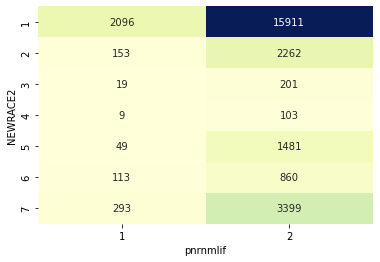

1    18007
7     3692
2     2415
5     1530
6      973
3      220
4      112
Name: NEWRACE2, dtype: int64

In [11]:
#Visualize misuse status by race/ethnicity group
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.NEWRACE2, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

data_filtered.NEWRACE2.value_counts() 

In [12]:
#Create new dummy variables for each categories

data_filtered.loc[data_filtered['NEWRACE2'] == 1, 'RaceEth_white'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 1, 'RaceEth_white'] = 0

data_filtered.loc[data_filtered['NEWRACE2'] == 2, 'RaceEth_black'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 2, 'RaceEth_black'] = 0

data_filtered.loc[data_filtered['NEWRACE2'] == 3, 'RaceEth_native'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 3, 'RaceEth_native'] = 0

data_filtered.loc[data_filtered['NEWRACE2'] == 4, 'RaceEth_islander'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 4, 'RaceEth_islander'] = 0

data_filtered.loc[data_filtered['NEWRACE2'] == 5, 'RaceEth_asian'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 5, 'RaceEth_asian'] = 0

data_filtered.loc[data_filtered['NEWRACE2'] == 6, 'RaceEth_multi'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 6, 'RaceEth_multi'] = 0

data_filtered.loc[data_filtered['NEWRACE2'] == 7, 'RaceEth_hisp'] = 1
data_filtered.loc[data_filtered['NEWRACE2'] != 7, 'RaceEth_hisp'] = 0


### Sex (irsex)

1 = Male
2 = Female

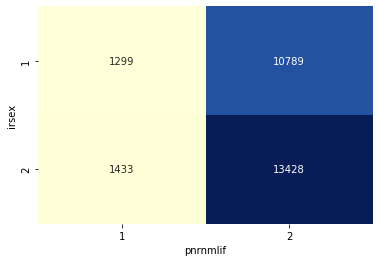

2    14861
1    12088
Name: irsex, dtype: int64

In [13]:
#Visualize misuse status by sex group
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.irsex, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Count number of cases by unique values
data_filtered.irsex.value_counts() 


In [14]:
# Change to Male = 0, female =1
data_filtered.irsex = data_filtered.irsex - 1

In [15]:
data_filtered.irsex.value_counts() 

1    14861
0    12088
Name: irsex, dtype: int64

### Sexual identity (sexident)
* 1 = Heterosexual/straight
* 2 = Lesbian or Gay
* 3 = Bisexual
* 85 = BAD DATA Logically assigned
* 94 = DON'T KNOW
* 97 = REFUSED
* 98 = BLANK (NO ANSWER)
* 99 = LEGITIMATE SKIP

In [16]:
data_filtered.sexident.value_counts() 

1     23021
3      1919
98      939
2       708
97      224
94      132
85        6
Name: sexident, dtype: int64

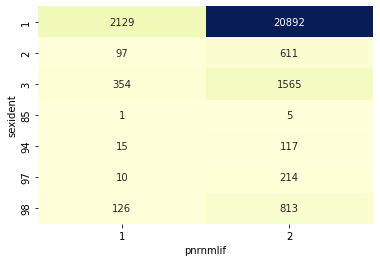

In [17]:
#Visualize misuse status by sex id group
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.sexident, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

### Education (IREDUHIGHST2)
* 1 = Fifth grade or less grade completed
* 2 = Sixth grade completed
* 3 = Seventh grade completed
* 4 = Eighth grade completed
* 5 = Ninth grade completed
* 6 = Tenth grade completed
* 7 = Eleventh or Twelfth grade completed, no diploma
* 8 = High school diploma/GED
* 9 = Some college credit, but no degree
* 10 = Associate's degree (for example, AA, AS)
* 11 = College graduate or higher

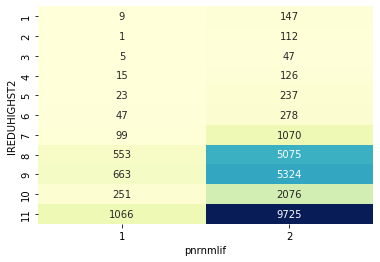

In [18]:
#Visualize misuse status by education
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.IREDUHIGHST2, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

### Employment status (irwrkstat)
* 1 = Employed full time
* 2 = Employed part time
* 3 = Unemployed
* 4 = Other (incl. not in labor force)
* 99 = 12-14 year olds

In [19]:
data_filtered.irwrkstat.value_counts() 

1    13821
4     7508
2     4090
3     1530
Name: irwrkstat, dtype: int64

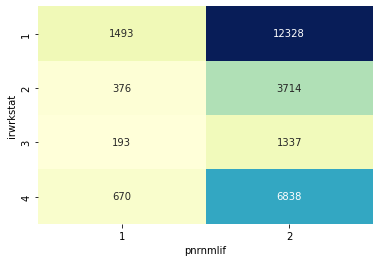

In [20]:
#Visualize misuse status by education
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.irwrkstat, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

In [21]:
#Create new dummy variables for each categories

data_filtered.loc[data_filtered['irwrkstat'] == 1, 'wrkstat_empfull'] = 1
data_filtered.loc[data_filtered['irwrkstat'] != 1, 'wrkstat_empfull'] = 0

data_filtered.loc[data_filtered['irwrkstat'] == 2, 'wrkstat_emppart'] = 1
data_filtered.loc[data_filtered['irwrkstat'] != 2, 'wrkstat_emppart'] = 0

data_filtered.loc[data_filtered['irwrkstat'] == 3, 'wrkstat_unemp'] = 1
data_filtered.loc[data_filtered['irwrkstat'] != 3, 'wrkstat_unemp'] = 0

data_filtered.loc[data_filtered['irwrkstat'] == 4, 'wrkstat_other'] = 1
data_filtered.loc[data_filtered['irwrkstat'] != 4, 'wrkstat_other'] = 0

### Income level (IRPINC3)
* 1 = Less than $10,000 (Including Loss)
* 2 = $10,000 - $19,999
* 3 = $20,000 - $29,999
* 4 = $30,000 - $39,999
* 5 = $40,000 - $49,999
* 6 = $50,000 - $74,999
* 7 = $75,000 or more

In [22]:
data_filtered.IRPINC3.value_counts() 

1    6198
7    4775
2    4036
6    3705
3    3070
4    2771
5    2394
Name: IRPINC3, dtype: int64

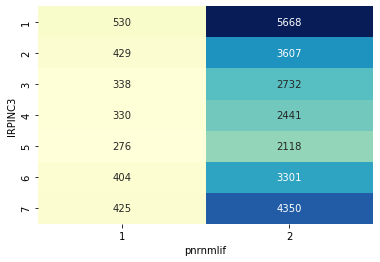

In [23]:
#Visualize misuse status by Income level
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.IRPINC3, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

### County metro/nonmetro status (COUTYP4)
* 1 = Large Metro
* 2 = Small Metro -- Will be recoded as 1 (1 = metro)
* 3 = Nonmetro -- will be recoded as 0 (0=nonmetro)

1    22148
0     4793
Name: COUTYP4, dtype: int64


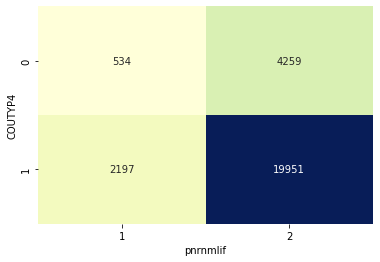

In [42]:
print(data_filtered.COUTYP4.value_counts())
#Visualize misuse status by County metro/nonmetro status
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.COUTYP4, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Create new dummy variables for each categories

data_filtered.loc[data_filtered['COUTYP4'] == 2, 'COUTYP4'] = 1
data_filtered.loc[data_filtered['COUTYP4'] == 3, 'COUTYP4'] = 0


In [25]:
print(data_filtered.COUTYP4.value_counts())

1    22155
0     4794
Name: COUTYP4, dtype: int64


### Overall health (health)
* 1 = Excellent
* 2 = Very good
* 3 = Good
* 4 = Fair
* 5 = Poor
* 94 = DON'T KNOW
* 97 = REFUSED 

***Scoring will be reversed so that lower score = lower overall health***

2     10810
3      7697
1      5802
4      2267
5       365
94        6
97        2
Name: health, dtype: int64


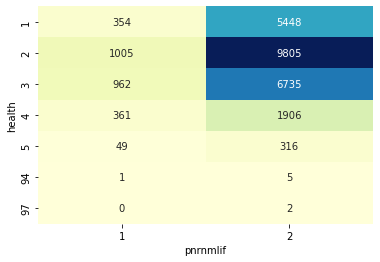

In [26]:
print(data_filtered.health.value_counts())

#Visualize misuse status by Overall health
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.health, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Excluding missing health data
data_filtered = data_filtered[data_filtered.health != 94]
data_filtered = data_filtered[data_filtered.health != 97]

In [27]:
#Reverse coding the values
data_filtered.health = 6-data_filtered.health
print(data_filtered.health.value_counts())

4    10810
3     7697
5     5802
2     2267
1      365
Name: health, dtype: int64


### Insurance status (IRINSUR4)
* 1 = Yes, respondent is covered by health insurance
* 2 = No, respondent is not covered by health insurance

1    24287
2     2654
Name: IRINSUR4, dtype: int64


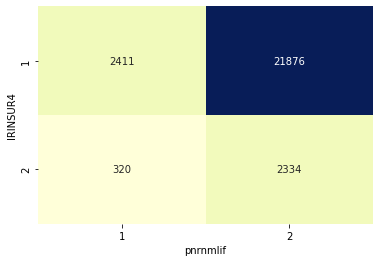

1    24287
0     2654
Name: IRINSUR4, dtype: int64


In [28]:
print(data_filtered.IRINSUR4.value_counts())

#Visualize misuse status by Insurance status
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.IRINSUR4, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

# Change No =2 to No = 0
data_filtered.loc[data_filtered['IRINSUR4'] == 2, 'IRINSUR4'] = 0
print(data_filtered.IRINSUR4.value_counts())

### Coverage for mental or emotional problems (hltinmnt)
* 1 = Yes
* 2 = No
* 94 = DON'T KNOW
* 97 = REFUSED
* 98 = BLANK (NO ANSWER)
* 99 = LEGITIMATE SKIP (No health insurance)

***2, 94, 97, 98, 99 were later recoded as 0, which will be No/unknown coverage***

1     12991
99     8106
2      2150
94     2106
98     1537
97       51
Name: hltinmnt, dtype: int64


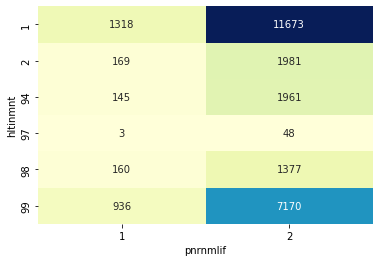

0    13950
1    12991
Name: hltinmnt, dtype: int64


In [29]:
print(data_filtered.hltinmnt.value_counts())

#Visualize misuse status by Coverage for mental or emotional problems 
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.hltinmnt, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Recode 2, 94, 97, 98, 99 as 0 (0 = No/unknown)
data_filtered.loc[data_filtered['hltinmnt'] == 2, 'hltinmnt'] = 0
data_filtered.loc[data_filtered['hltinmnt'] == 94, 'hltinmnt'] = 0
data_filtered.loc[data_filtered['hltinmnt'] == 97, 'hltinmnt'] = 0
data_filtered.loc[data_filtered['hltinmnt'] == 98, 'hltinmnt'] = 0
data_filtered.loc[data_filtered['hltinmnt'] == 99, 'hltinmnt'] = 0

print(data_filtered.hltinmnt.value_counts())


### Coverage for alcohol abuse or alcoholism (hltinalc)
* 1 = Yes
* 2 = No
* 94 = DON'T KNOW
* 97 = REFUSED
* 98 = BLANK (NO ANSWER)
* 99 = LEGITIMATE SKIP (No health insurance)

***2, 94, 97, 98, 99 were later recoded as 0, which will be No/unknown coverage***


1     10195
99     8106
94     3822
2      3226
98     1537
97       55
Name: hltinalc, dtype: int64


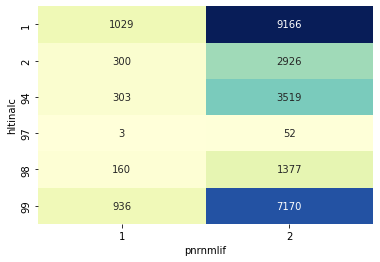

0    16746
1    10195
Name: hltinalc, dtype: int64


In [30]:
print(data_filtered.hltinalc.value_counts())

#Visualize misuse status by Coverage for alcohol abuse or alcoholism 
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.hltinalc, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Recode 2, 94, 97, 98, 99 as 0 (0 = No/unknown)
data_filtered.loc[data_filtered['hltinalc'] == 2, 'hltinalc'] = 0
data_filtered.loc[data_filtered['hltinalc'] == 94, 'hltinalc'] = 0
data_filtered.loc[data_filtered['hltinalc'] == 97, 'hltinalc'] = 0
data_filtered.loc[data_filtered['hltinalc'] == 98, 'hltinalc'] = 0
data_filtered.loc[data_filtered['hltinalc'] == 99, 'hltinalc'] = 0

print(data_filtered.hltinalc.value_counts())

### Coverage for drug abuse treatment (hltindrg)
* 1 = Yes
* 2 = No
* 94 = DON'T KNOW
* 97 = REFUSED
* 98 = BLANK (NO ANSWER)
* 99 = LEGITIMATE SKIP (No health insurance)

***2, 94, 97, 98, 99 were later recoded as 0, which will be No/unknown coverage***

1     10149
99     8106
94     3753
2      3340
98     1537
97       56
Name: hltindrg, dtype: int64


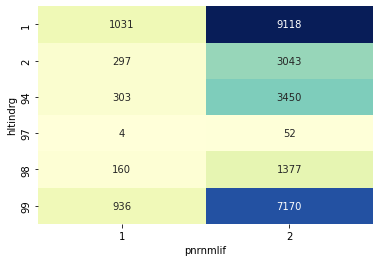

0    16792
1    10149
Name: hltindrg, dtype: int64


In [31]:
print(data_filtered.hltindrg.value_counts())

#Visualize misuse status by Coverage for drug abuse treatment 
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.hltindrg, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Recode 2, 94, 97, 98, 99 as 0 (0 = No/unknown)
data_filtered.loc[data_filtered['hltindrg'] == 2, 'hltindrg'] = 0
data_filtered.loc[data_filtered['hltindrg'] == 94, 'hltindrg'] = 0
data_filtered.loc[data_filtered['hltindrg'] == 97, 'hltindrg'] = 0
data_filtered.loc[data_filtered['hltindrg'] == 98, 'hltindrg'] = 0
data_filtered.loc[data_filtered['hltindrg'] == 99, 'hltindrg'] = 0

print(data_filtered.hltindrg.value_counts())

### Mental Health Score (WHODASC2)
This variable indicating the level of impairment for respondents is based on data collected from a series of thirteen questions asking respondents how much difficulty they experienced in doing eight daily activities in the one month in the past year when they were at their worst emotionally. These questions, drawn from the World Health Organization Disability Assessment Schedule (WHODAS).WHOSASC2 ranges from 0 (no difficulty) to 24 (severe difficulty).

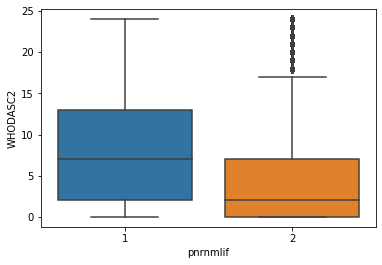

In [32]:
plt.figure()
sns.boxplot(x = 'pnrnmlif', y = 'WHODASC2', data = data_filtered)
plt.show()

### Serious psychological distress indicator (spdyr)
* 0 = No
* 1 = Yes

0.0    22011
1.0     4930
Name: spdyr, dtype: int64


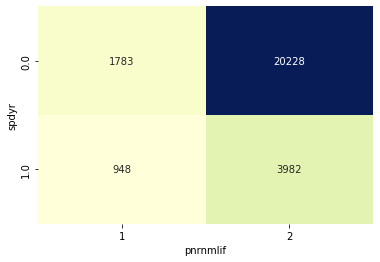

In [33]:
print(data_filtered.spdyr.value_counts())

#Visualize misuse status by Serious psychological distress indicator
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.spdyr, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()


### Serious suicidal ideation indicator (mhsuithk)
* 0 = No
* 1 = Yes

Missing values will be recoded as 0 (0=No/Unknown)

0.0    24290
1.0     1796
Name: mhsuithk, dtype: int64


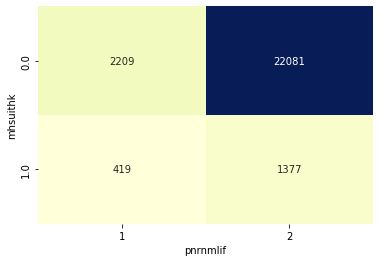

In [34]:
print(data_filtered.mhsuithk.value_counts())

#Visualize misuse status by Serious suicidal ideation indicator
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.mhsuithk, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()


In [35]:
data_filtered.mhsuithk.isnull().sum()

855

In [36]:
#Recode missing data
data_filtered.mhsuithk=data_filtered.mhsuithk.fillna(0)
data_filtered.mhsuithk.isnull().sum()

0

### Adult illicit drug or alcohol use disorder (UDYR5ILAL)
* 0 = No
* 1 = Yes

0    22035
1     4906
Name: UDYR5ILAL, dtype: int64


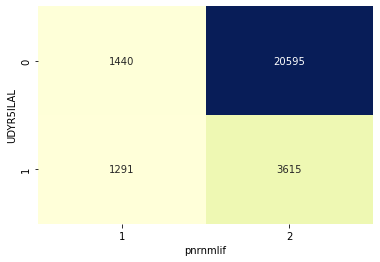

In [37]:
print(data_filtered.UDYR5ILAL.value_counts())

#Visualize misuse status by Adult illicit drug or alcohol use disorder
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.UDYR5ILAL, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()


### Adult lifetime major depressive disorder (amdelt)
* 1 = Yes
* 2 = No. This will be recoded as 0 (0=No/Unknown)

2.0    20767
1.0     5198
Name: amdelt, dtype: int64


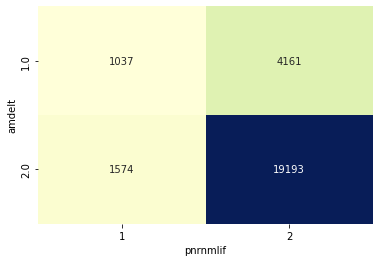

In [38]:
print(data_filtered.amdelt.value_counts())

#Visualize misuse status by Adult lifetime major depressive disorder
plt.figure()
sns.heatmap(pd.crosstab(index=data_filtered.amdelt, 
                        columns=[data_filtered.pnrnmlif]),
            cmap="YlGnBu", annot=True, fmt='.5g', cbar=False)
plt.show()

#Recode 2 as 0 (0 = No/unknown)
data_filtered.loc[data_filtered['amdelt'] == 2, 'amdelt'] = 0

In [39]:
data_filtered.amdelt.isnull().sum()

976

In [40]:
##Recode missing data
data_filtered.amdelt=data_filtered.amdelt.fillna(0)
data_filtered.amdelt.isnull().sum()

0

In [45]:
filepath = "C:/Users/kimng/Desktop/EDPY506/Final Project/data_filtered.csv"
data_filtered.to_csv(filepath) 